<a href="https://colab.research.google.com/github/DeekshithaD3/machinelearning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **Handling null values of train dataset**

<Axes: >

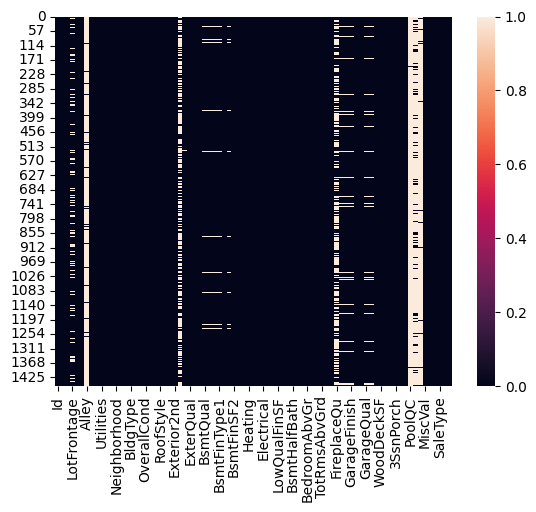

In [ ]:
sns.heatmap(df_train.isnull())

In [ ]:
df_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df_train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
df_train['LotFrontage'].isnull().sum()

259

In [ ]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [ ]:
df_train['LotShape'].isnull().sum()

0

In [ ]:
df_train.drop(['Alley'],axis=1,inplace=True)

In [ ]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df_train['SaleType']=df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

In [ ]:
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['MSZoning']=df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

In [ ]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])

In [ ]:
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

<Axes: >

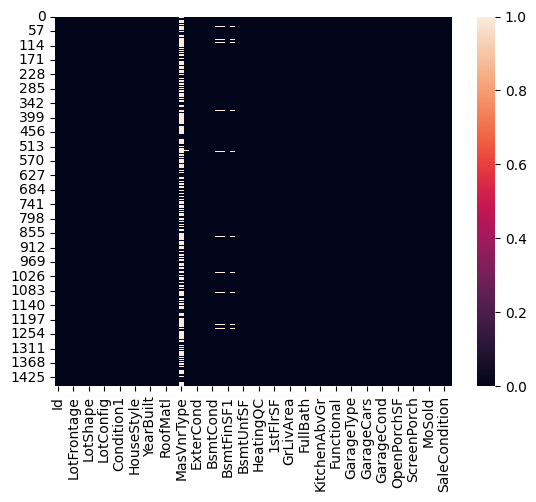

In [ ]:
sns.heatmap(df_train.isnull())

In [ ]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

In [ ]:
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['BsmtFinSF1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['SaleType']=df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])
df_train['BsmtUnfSF']=df_train['BsmtUnfSF'].fillna(df_train['BsmtUnfSF'].mode()[0])

<Axes: >

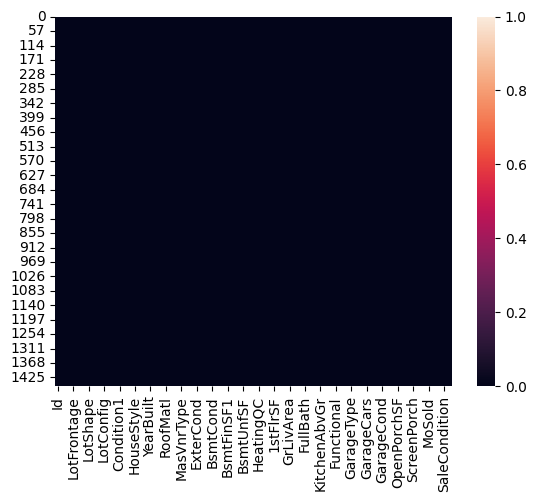

In [ ]:
sns.heatmap(df_train.isnull())

# **Handling categorical data of train dataset**

In [ ]:
#handle categorical data
cat_colstr=df_train.select_dtypes(include=['object']).columns.tolist()
num_colstr= df_train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_colstr)
print("Numerical Variables:")
print(num_colstr)

Categorical Variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 

In [ ]:
from pandas.api.types import CategoricalDtype

**Handling ordinal data**

In [ ]:
df_train['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df_train['ExterQual']=df_train['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [ ]:
df_train['BsmtExposure']=df_train['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes

In [ ]:
df_train['ExterCond']=df_train['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['BsmtQual']=df_train['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['BsmtCond']=df_train['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['HeatingQC']=df_train['HeatingQC'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_train['KitchenQual']=df_train['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['FireplaceQu']=df_train['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['GarageQual']=df_train['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['GarageCond']=df_train['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_train['Functional']=df_train['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes
df_train['GarageFinish']=df_train['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df_train['PavedDrive']=df_train['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
df_train['Utilities']=df_train['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSeWr','AllPub'],ordered=True)).cat.codes
df_train['BsmtFinType1']=df_train['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_train['BsmtFinType2']=df_train['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes

In [ ]:
tr_encod=df_train.copy()

In [ ]:
cat_feat=tr_encod.select_dtypes(include='object').columns.tolist()
print(len(cat_feat))
print(cat_feat)

24
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinSF1', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']


In [ ]:
print("bfr",tr_encod.shape)
tr_encod=pd.get_dummies(tr_encod,
                       columns=cat_feat,
                       prefix=cat_feat,
                       drop_first=True)
print("aftr",tr_encod.shape)

bfr (1460, 77)
aftr (1460, 201)


In [ ]:
tr_encod.select_dtypes(include='object').columns.tolist()

[]

In [ ]:
len_train=tr_encod.shape[0]
len_train

1460

In [ ]:
x_train=tr_encod[:len_train].drop("SalePrice",axis=1)
y_train=tr_encod["SalePrice"][:len_train]
print(x_train.shape)
print(y_train.shape)

(1460, 200)
(1460,)


In [ ]:
x_train['HouseAge'] = x_train['YrSold'] - x_train['YearBuilt']
x_train['RemodAge'] = x_train['YrSold'] - x_train['YearRemodAdd']
x_train['IsNew'] = (x_train['YearBuilt'] == x_train['YrSold']).astype(int)

In [ ]:
x_train['TotalPorchSF'] = x_train['EnclosedPorch'] + x_train['3SsnPorch'] + x_train['ScreenPorch']

In [ ]:
#Total number of rooms above ground (excluding bathrooms)
x_train['TotalRooms'] = x_train['TotRmsAbvGrd'] - x_train['FullBath'] - x_train['HalfBath']

In [ ]:
# Quality score: a combination of OverallQual and OverallCond
x_train['QualityScore'] = x_train['OverallQual'] * x_train['OverallCond']

In [ ]:
#  Garage score: combining garage area and car capacity
x_train['GarageScore'] = x_train['GarageArea'] * x_train['GarageCars']

# **preprocessing test data**

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


<Axes: >

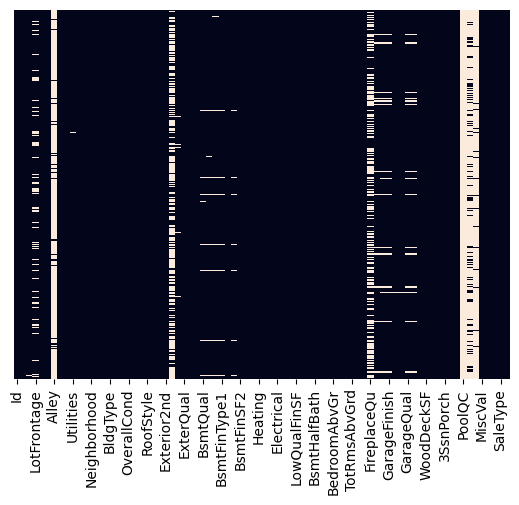

In [ ]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [ ]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())


In [ ]:
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [ ]:
df_test['FireplaceQu'].isnull().sum()

730

In [ ]:
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])

In [ ]:
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [ ]:
df_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df_test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


<Axes: >

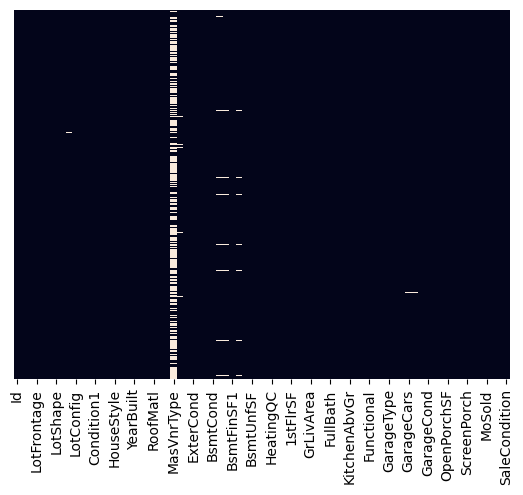

In [ ]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [ ]:
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

In [ ]:
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtFinSF1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mode()[0])

<Axes: >

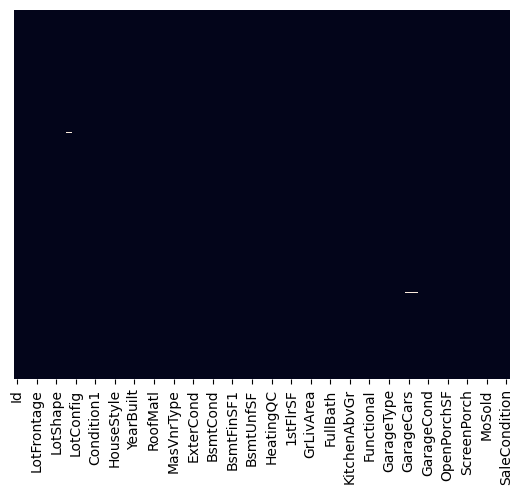

In [ ]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [ ]:
df_test.shape

(1459, 76)

In [ ]:
df_test['GarageArea'].isnull().sum()

1

In [ ]:
df_test['Utilities']=df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])

In [ ]:
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0])

In [ ]:
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mode()[0])

<Axes: >

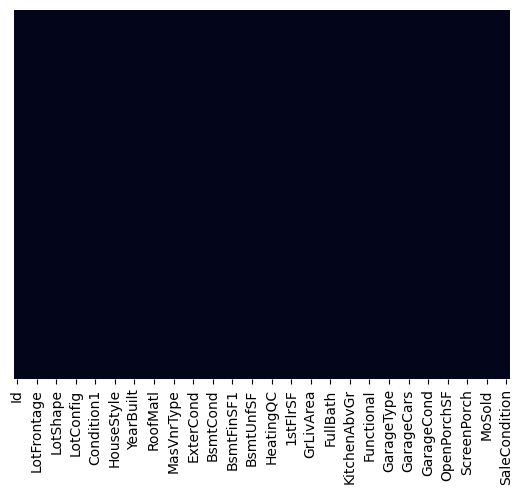

In [ ]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

# **Handling ordinal catogorical data**

In [ ]:
#handle categorical data
cat_colsts=df_test.select_dtypes(include=['object']).columns.tolist()
num_colsts= df_test.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_colsts)
print("Numerical Variables:")
print(num_colsts)

Categorical Variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
df_test['ExterQual']=df_test['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [ ]:
df_test['BsmtExposure']=df_test['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes

In [ ]:
df_test['ExterCond']=df_test['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['BsmtQual']=df_test['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['BsmtCond']=df_test['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['HeatingQC']=df_test['HeatingQC'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_test['KitchenQual']=df_test['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['FireplaceQu']=df_test['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['GarageQual']=df_test['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['GarageCond']=df_test['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_test['Functional']=df_test['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes
df_test['GarageFinish']=df_test['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df_test['PavedDrive']=df_test['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
df_test['Utilities']=df_test['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSeWr','AllPub'],ordered=True)).cat.codes
df_test['BsmtFinType1']=df_test['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_test['BsmtFinType2']=df_test['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes

# **Handling nominal catogorical test data**

In [ ]:
ts_encod=df_test.copy()

In [ ]:
cat_feat2=ts_encod.select_dtypes(include='object').columns.tolist()
print(len(cat_feat2))
print(cat_feat2)

24
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinSF1', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']


In [ ]:
print("bfr",ts_encod.shape)
ts_encod=pd.get_dummies(ts_encod,
                       columns=cat_feat,
                       prefix=cat_feat,
                       drop_first=True)
print("aftr",ts_encod.shape)

bfr (1459, 76)
aftr (1459, 186)


In [ ]:
# # Align the test set to the train set's columns, filling missing columns with 0
# ts_encod = ts_encod.reindex(columns=tr_encod.columns, fill_value=0)

# # Print the shapes to verify
# print("Train shape after alignment:", tr_encod.shape)
# print("Test shape after alignment:", ts_encod.shape)

In [ ]:
ts_encod.select_dtypes(include='object').columns.tolist()

[]

In [ ]:
# x_train=tr_encod[:len_train].drop("SalePrice",axis=1)
# #y_train=d_encod[:len_train].SalePrice
# y_train=tr_encod["SalePrice"][:len_train]
# print(x_train.shape)
# print(y_train.shape)

In [ ]:
# Convert ts_encod back to a DataFrame
ts_encod = pd.DataFrame(ts_encod)

# Check if the required columns exist
if 'YrSold' in ts_encod.columns and 'YearBuilt' in ts_encod.columns:
    ts_encod['HouseAge'] = ts_encod['YrSold'] - ts_encod['YearBuilt']
if 'YrSold' in ts_encod.columns and 'YearRemodAdd' in ts_encod.columns:
    ts_encod['RemodAge'] = ts_encod['YrSold'] - ts_encod['YearRemodAdd']
if 'YearBuilt' in ts_encod.columns and 'YrSold' in ts_encod.columns:
    ts_encod['IsNew'] = (ts_encod['YearBuilt'] == ts_encod['YrSold']).astype(int)
else:
    print("Warning: 'YrSold', 'YearBuilt', or 'YearRemodAdd' columns not found in DataFrame.")

In [ ]:
ts_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 189 entries, Id to IsNew
dtypes: bool(134), float64(10), int64(29), int8(16)
memory usage: 658.4 KB


In [ ]:
# Convert ts_encod back to a DataFrame
ts_encod = pd.DataFrame(ts_encod)
ts_encod['HouseAge'] = ts_encod['YrSold'] - ts_encod['YearBuilt']
ts_encod['RemodAge'] = ts_encod['YrSold'] - ts_encod['YearRemodAdd']
ts_encod['IsNew'] = (ts_encod['YearBuilt'] == ts_encod['YrSold']).astype(int)

In [ ]:
ts_encod['TotalPorchSF'] = ts_encod['EnclosedPorch'] + ts_encod['3SsnPorch'] + ts_encod['ScreenPorch']

In [ ]:
#Total number of rooms above ground (excluding bathrooms)
ts_encod['TotalRooms'] = ts_encod['TotRmsAbvGrd'] - ts_encod['FullBath'] - ts_encod['HalfBath']

In [ ]:
# Quality score: a combination of OverallQual and OverallCond
ts_encod['QualityScore'] = ts_encod['OverallQual'] * ts_encod['OverallCond']

In [ ]:
#  Garage score: combining garage area and car capacity
ts_encod['GarageScore'] = ts_encod['GarageArea'] * ts_encod['GarageCars']

In [ ]:
# Align the test set to the train set's columns, filling missing columns with 0
ts_encod = ts_encod.reindex(columns=x_train.columns, fill_value=0)

# Print the shapes to verify
print("Train shape after alignment:", x_train.shape)
print("Test shape after alignment:", ts_encod.shape)

Train shape after alignment: (1460, 207)
Test shape after alignment: (1459, 207)


# **Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)

In [ ]:
sc=StandardScaler()
sc.fit(ts_encod)
ts_encod=sc.transform(ts_encod)

# **regression model building**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression

In [ ]:
svr=SVR()
lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
#abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
mlpr=MLPRegressor()
xgbr=XGBRegressor()

In [ ]:
models={"a":[svr],"b":[lr],"c":[sgdr],"d":[knr],"e":[gpr],"f":[dtr],"g":[rfr],"h":[gbr],"i":[mlpr],"j":[xgbr]}

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [ ]:
models_score=[]
for model in models:
    print("training model : ",models[model][0])
    score = test_model(models[model][0],x_train, y_train)
    print("score of model",score)
    models_score.append([models[model][0],score[0]])

training model :  SVR()
score of model [-0.05183786433104519]
training model :  LinearRegression()
score of model [-1.3818691840461544e+22]
training model :  SGDRegressor()
score of model [-269.46661373989843]
training model :  KNeighborsRegressor()
score of model [0.702079040953982]
training model :  GaussianProcessRegressor()
score of model [-5.378285420766413]
training model :  DecisionTreeRegressor()
score of model [0.7063030308317906]
training model :  RandomForestRegressor()
score of model [0.843663849288668]
training model :  GradientBoostingRegressor()
score of model [0.8683778584002988]
training model :  MLPRegressor()
score of model [-4.962168280246692]
training model :  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy

In [ ]:
models_score

[[SVR(), -0.05183786433104519],
 [LinearRegression(), -1.3818691840461544e+22],
 [SGDRegressor(), -269.46661373989843],
 [KNeighborsRegressor(), 0.702079040953982],
 [GaussianProcessRegressor(), -5.378285420766413],
 [DecisionTreeRegressor(), 0.7063030308317906],
 [RandomForestRegressor(), 0.843663849288668],
 [GradientBoostingRegressor(), 0.8683778584002988],
 [MLPRegressor(), -4.962168280246692],
 [XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, 

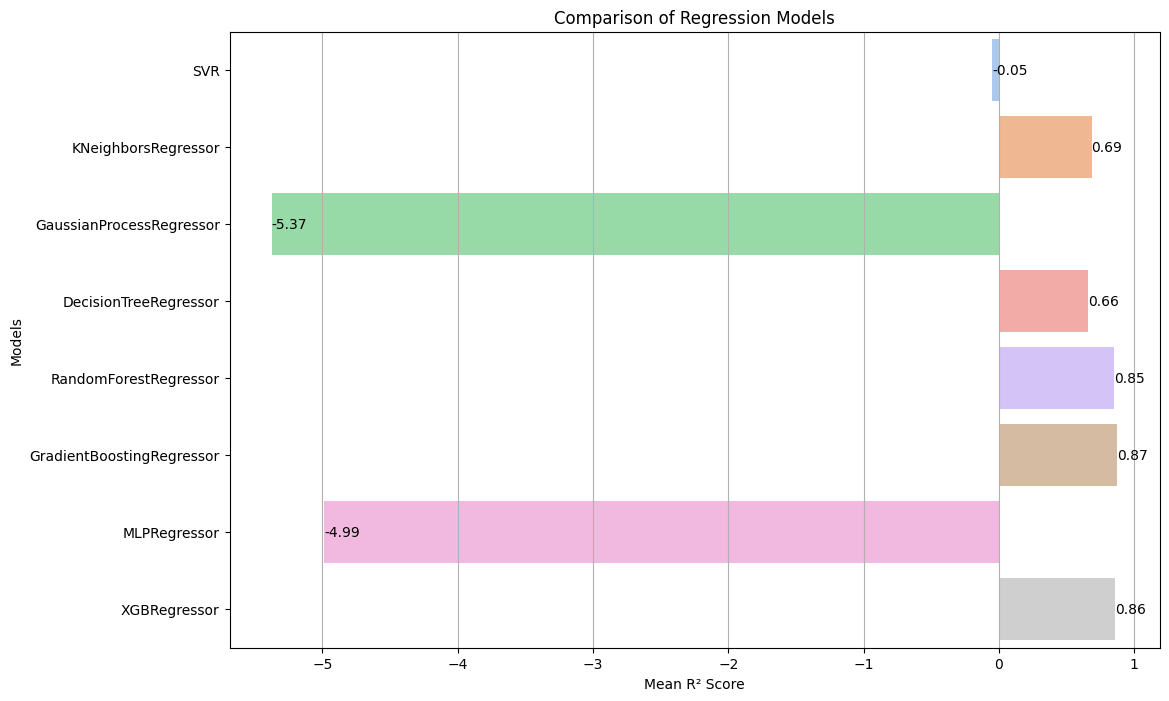

In [ ]:
# Example models_score data
models_score = [
    ('SVR', -0.051874839807911535),
    ('KNeighborsRegressor', 0.6852510746398471),
    ('GaussianProcessRegressor', -5.3743105577749475 ),
    ('DecisionTreeRegressor', 0.6592059405270246),
    ('RandomForestRegressor', 0.8485509964258817 ),
    ('GradientBoostingRegressor', 0.8747221578880422 ),
    ('MLPRegressor', -4.987432628207839),
    ('XGBRegressor', 0.8593973574975813),
]

# Create a DataFrame
df = pd.DataFrame(models_score, columns=['Model', 'Mean_R2_Score'])

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df, y='Model', x='Mean_R2_Score', palette='pastel')  # Use a valid palette name

# Adding labels and title
plt.xlabel('Mean R² Score')
plt.ylabel('Models')
plt.title('Comparison of Regression Models')

# Add the score values next to the bars
for index, value in enumerate(df['Mean_R2_Score']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')

plt.grid(axis='x')

plt.show()

In [ ]:
# Train each model and make predictions
predictions = {}
for model_name, model in models.items():
  if isinstance(model, list):
    model = model[0]
    # Train the model on the entire training dataset
    model.fit(x_train,y_train)
    # Predict the sales_price on the test dataset
    y_pred = model.predict(x_train)
    predictions[model_name] = y_pred

# Print or save the predictions
for model_name, y_pred in predictions.items():
    print(f"Predictions for {model_name}: {y_pred}")

Predictions for a: [163092.57110439 163015.78865247 163099.21634666 ... 163021.1468265
 162984.08727036 162996.75416099]
Predictions for b: [210380.6364679  204469.19205677 208219.9394755  ... 270365.00531451
 149234.61823607 153945.20913835]
Predictions for c: [-514204.49688408 -579128.56338346 -262408.79042732 ...   44687.07860254
  737428.99373356  180528.59999307]
Predictions for d: [209960.  189100.  215880.  ... 170055.2 143425.  134000. ]
Predictions for e: [208499.9999792  181499.99998185 223499.99997766 ... 266499.99997335
 142124.99998579 147499.99998525]
Predictions for f: [208500. 181500. 223500. ... 266500. 142125. 147500.]
Predictions for g: [208101.5  176663.5  218649.   ... 261011.68 139526.8  149249.5 ]
Predictions for h: [205913.32826353 173674.48410963 214443.16901164 ... 272087.89456556
 145510.35147131 155808.64401472]
Predictions for i: [ 9560.878738    2408.40975098 10844.24451943 ...  3490.91483165
  5047.320418    3011.23000666]
Predictions for j: [207289.12 18

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# # Train each model and make predictions
# predictions = {}
# for model_name, model in models.items():
#   if isinstance(model, list):
#     model = model[0]
#     # Train the model on the entire training dataset
#     model.fit(x_train,y_train)
#      # Impute missing values in x_test (replace this with your preferred imputation method)
#     x_test = pd.DataFrame(SimpleImputer().fit_transform(x_test), columns=x_test.columns)
#     # Predict the sales_price on the test dataset
#     y_pred = model.predict(x_test)
#     predictions[model_name] = y_pred

# # Print or save the predictions
# for model_name, y_pred in predictions.items():
#     print(f"Predictions for {model_name}: {y_pred}")

In [ ]:
# Train each model and make predictions
predictions = {}
for model_name, model in models.items():
  if isinstance(model, list):
    model = model[0]
    # Train the model on the entire training dataset
    model.fit(x_train,y_train)
    # Assuming 'ts_encod' was originally a DataFrame,
    # create a copy to preserve column names
    ts_encod_df = pd.DataFrame(ts_encod)
     # Impute missing values in x_test (replace this with your preferred imputation method)
    ts_encod_imputed = pd.DataFrame(SimpleImputer().fit_transform(ts_encod_df), columns=ts_encod_df.columns)
    # Predict the sales_price on the test dataset
    y_pred = model.predict(ts_encod_imputed)
    predictions[model_name] = y_pred

# Print or save the predictions
for model_name, y_pred in predictions.items():
    print(f"Predictions for {model_name}: {y_pred}")

Predictions for a: [162994.23905135 163009.47787738 163076.94332944 ... 163015.95241274
 163007.9771901  163057.35536675]
Predictions for b: [ 2.77759847e+15 -6.98070063e+13 -3.92012789e+14 ...  4.53305902e+14
  1.75287721e+15 -2.24314582e+15]
Predictions for c: [ -201110.78600643 -1211397.73977983   180029.42965897 ...
    35895.41570275   241636.77856774   600821.13918572]
Predictions for d: [136170. 175080. 185820. ... 141670. 129500. 191880.]
Predictions for e: [1.93307032e-27 3.70794241e-48 5.91768976e+00 ... 8.84835433e-19
 6.47300474e-19 7.84459045e-16]
Predictions for f: [128500. 155000. 193000. ... 150000.  93500. 222000.]
Predictions for g: [129393.08 155158.   183088.28 ... 149980.3  112725.   240055.85]
Predictions for h: [123597.8882433  158286.28272973 169578.62166572 ... 166318.23395392
 116918.76039867 233207.11158423]
Predictions for i: [3810.70407417 3078.44507005 9500.12759455 ... 3855.62021541 1414.57954735
 6259.97394343]
Predictions for j: [116923.82  155953.14  1